In [1]:
pip install numpy opencv-python keras tensorflow

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.6 MB 787.7 kB/s eta 0:00:49
   ---------------------------------------- 0.1/38.6 MB 798.9 kB/s eta 0:00:49
   ---------------------------------------- 0.2/38.6 MB 871.5 kB/s eta 0:00:45
   ---------------------------------------- 0.3/38.6 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.3/38.6 MB 1.2 MB/s eta 0:00:34
   ---------------------------------------- 0.5/38.6 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.5/38.6 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.5/38.6 MB 1.3 MB/s eta 0:00:30
    ------

In [2]:
# Importing requied libraries
import numpy as np
import cv2
import os
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
def Load_Dataset(data_dir):
    images = []
    labels = []
    label_names = os.listdir(data_dir)
    for label in label_names:
        image_paths = os.listdir(os.path.join(data_dir, label))
        for image_path in image_paths:
            image_full_path = os.path.join(data_dir, label, image_path)
            image = cv2.imread(image_full_path)
            if image is not None:
                image = cv2.resize(image, (224, 224))
                images.append(image)
                labels.append(label)
            else:
                print(f"Warning: Unable to read image {image_full_path}")

    return np.array(images), np.array(labels)

data_dir = r'C:\Users\Hp-pc\Desktop\IDL_PROJECT\Dataset'
images, labels = Load_Dataset(data_dir)
images = images / 255.0

In [4]:
# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

with open(r'C:\Users\Hp-pc\Desktop\IDL_PROJECT\Label_Encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.3, random_state=42)

In [6]:
# Define the model
def CNN_Model(input_shape, num_classes):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create and compile the model
input_shape = (224, 224, 3)
num_classes = len(np.unique(labels_encoded))
model = CNN_Model(input_shape, num_classes)
model.summary()

D:\ANACONDA\ANACONDA INSTALL\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,403,791 (169.39 MB)

 Trainable params: 44,403,791 (169.39 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# Train the model
batch_size = 32
epochs = 50
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs
)
Loss, Accuracy = model.evaluate(X_test, y_test)
print('Test Accuracy:',Accuracy*100)
print('Test Loss:',Loss*100)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 185s 3s/step - accuracy: 0.1502 - loss: 2.3546 - val_accuracy: 0.2792 - val_loss: 2.0512
Epoch 2/50
 1/70 ━━━━━━━━━━━━━━━━━━━━ 2:15 2s/step - accuracy: 0.2188 - loss: 2.0700

D:\ANACONDA\ANACONDA INSTALL\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.2188 - loss: 2.0700 - val_accuracy: 0.2823 - val_loss: 2.0508
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.2691 - loss: 2.0896 - val_accuracy: 0.4612 - val_loss: 1.6700
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 186ms/step - accuracy: 0.1875 - loss: 1.8629 - val_accuracy: 0.4323 - val_loss: 1.6946
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.3257 - loss: 1.9115 - val_accuracy: 0.5181 - val_loss: 1.4703
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 185ms/step - accuracy: 0.4062 - loss: 1.6990 - val_accuracy: 0.5026 - val_loss: 1.5252
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.3796 - loss: 1.8030 - val_accuracy: 0.5243 - val_loss: 1.4200
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - accuracy: 0.4688 - loss: 1.5996 - val_accuracy: 0.5419 - val_loss: 1.3862
Epoch 9/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.4385 - loss: 1.6286 - val_accuracy: 0.5595 - val_

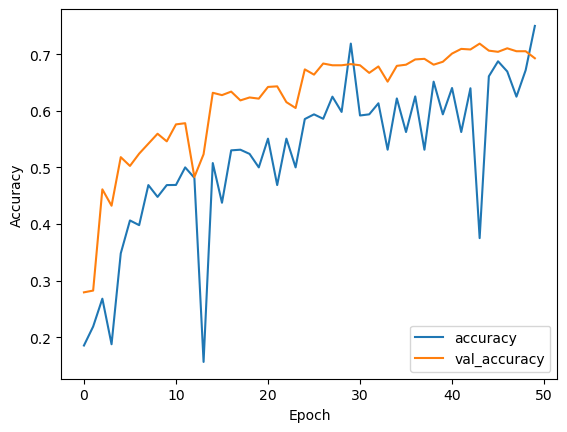

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [10]:
model.save(r'C:\Users\Hp-pc\Desktop\IDL_PROJECT\FaceRecognitionModel.h5')